
# <span style="color:rgb(213,80,0)">plot convergence (statistics) result with different sensor placements</span>

In [1]:
clear;
close all;

mu0 = 0.1405;

noise_magnitude_case = [0.1, 0.5, 1.0]; % INPUT
N_noise_case = length(noise_magnitude_case);

input_z_case = {}; % INPUT below
input_y_case = {}; % INPUT below
input_z_case{1} = [2:1:101];
input_y_case{1} = [1:1:19];
input_z_case{2} = [2:2:100];
input_y_case{2} = [1:2:19];
input_z_case{3} = [2:3:101];
input_y_case{3} = [1:3:19];
input_z_case{4} = [2:4:98];
input_y_case{4} = [1:4:17];
input_z_case{5} = [2:5:97];
input_y_case{5} = [1:5:16];
input_z_case{6} = [2:6:98];
input_y_case{6} = [1:6:19];

sensor_distances = [1, 2, 3, 4, 5, 6];
N_sensor_case = length(input_z_case);

mean_qbcs_reconst_diff_save = zeros(N_noise_case, N_sensor_case); % same row: same noise magnitude
reconst_Lqq_save = zeros(N_noise_case, N_sensor_case);
reconst_nnz_save = zeros(N_noise_case, N_sensor_case);
noise_estimation_save = zeros(N_noise_case, N_sensor_case);
iou_save = zeros(N_noise_case, N_sensor_case);
solution_Lqq = 0;
solution_L0 = 0;

## input data

In [2]:
% inputname1 = './single_qsource/steady_3d_conduction_convection_turb_v1_single_qsource_rectangle_G4215_0852kW.mat';
inputname1 = './single_qsource/steady_3d_conduction_convection_turb_v1_single_qsource_halfcross_G4215_0852kW.mat';
% inputname1 = './single_qsource/steady_3d_conduction_convection_turb_v1_single_qsource_arc1_G4215_0852kW.mat';
% inputname1 = './single_qsource/steady_3d_conduction_convection_turb_v1_single_qsource_groove1_G4215_0852kW.mat';

## calculation of each case

comment the calculation loop out when we have data


In [3]:
for idn=1:N_noise_case
    for ids=1:N_sensor_case
        [mean_qbcs_reconst_diff_save(idn,ids), reconst_Lqq_save(idn,ids), reconst_nnz_save(idn,ids), ...
            noise_estimation_save(idn,ids), iou_save(idn,ids), solution_Lqq, solution_L0]...
        = IRN_automu_sim_reinitialize_f(noise_magnitude_case(idn), input_z_case{ids}, input_y_case{ids}, mu0, inputname1);
    end
end

artificial noise magnitude [K]: 0.10 
iteration 2, re-initialize xiteration 7 (over 50), x converged. μ = (1.62e-01)
pnorm=2, qnorm=1.0e-01, μ=1.62e-01 (μ0 = 1.41e-01), iter=7 (50)
L2 (sol) = 4.361e+00, L1 (sol) = 3.749e+01, Lq^q (sol) = 5.293e+01
L2 (rec) = 4.339e+00, L1 (rec) = 3.753e+01, Lq^q (rec) = 1.175e+03
nnz (sol) = 5.500e+01 , nnz (rec) = 5.500e+01
The Intersection over Union (IoU) is: 1.000
Estimated noise magnitude [K]: 0.10
artificial noise magnitude [K]: 0.10 
iteration 2, re-initialize xiteration 9 (over 50), x converged. μ = (1.73e-01)
pnorm=2, qnorm=1.0e-01, μ=1.73e-01 (μ0 = 1.41e-01), iter=9 (50)
L2 (sol) = 2.243e+00, L1 (sol) = 3.749e+01, Lq^q (sol) = 5.293e+01
L2 (rec) = 2.229e+00, L1 (rec) = 3.748e+01, Lq^q (rec) = 1.098e+03
nnz (sol) = 5.500e+01 , nnz (rec) = 5.500e+01
The Intersection over Union (IoU) is: 1.000
Estimated noise magnitude [K]: 0.10
artificial noise magnitude [K]: 0.10 
iteration 2, re-initialize xiteration 12 (over 50), x converged. μ = (1.68e-01)


## plot result

In [4]:
fontsize = 14;

## MAE


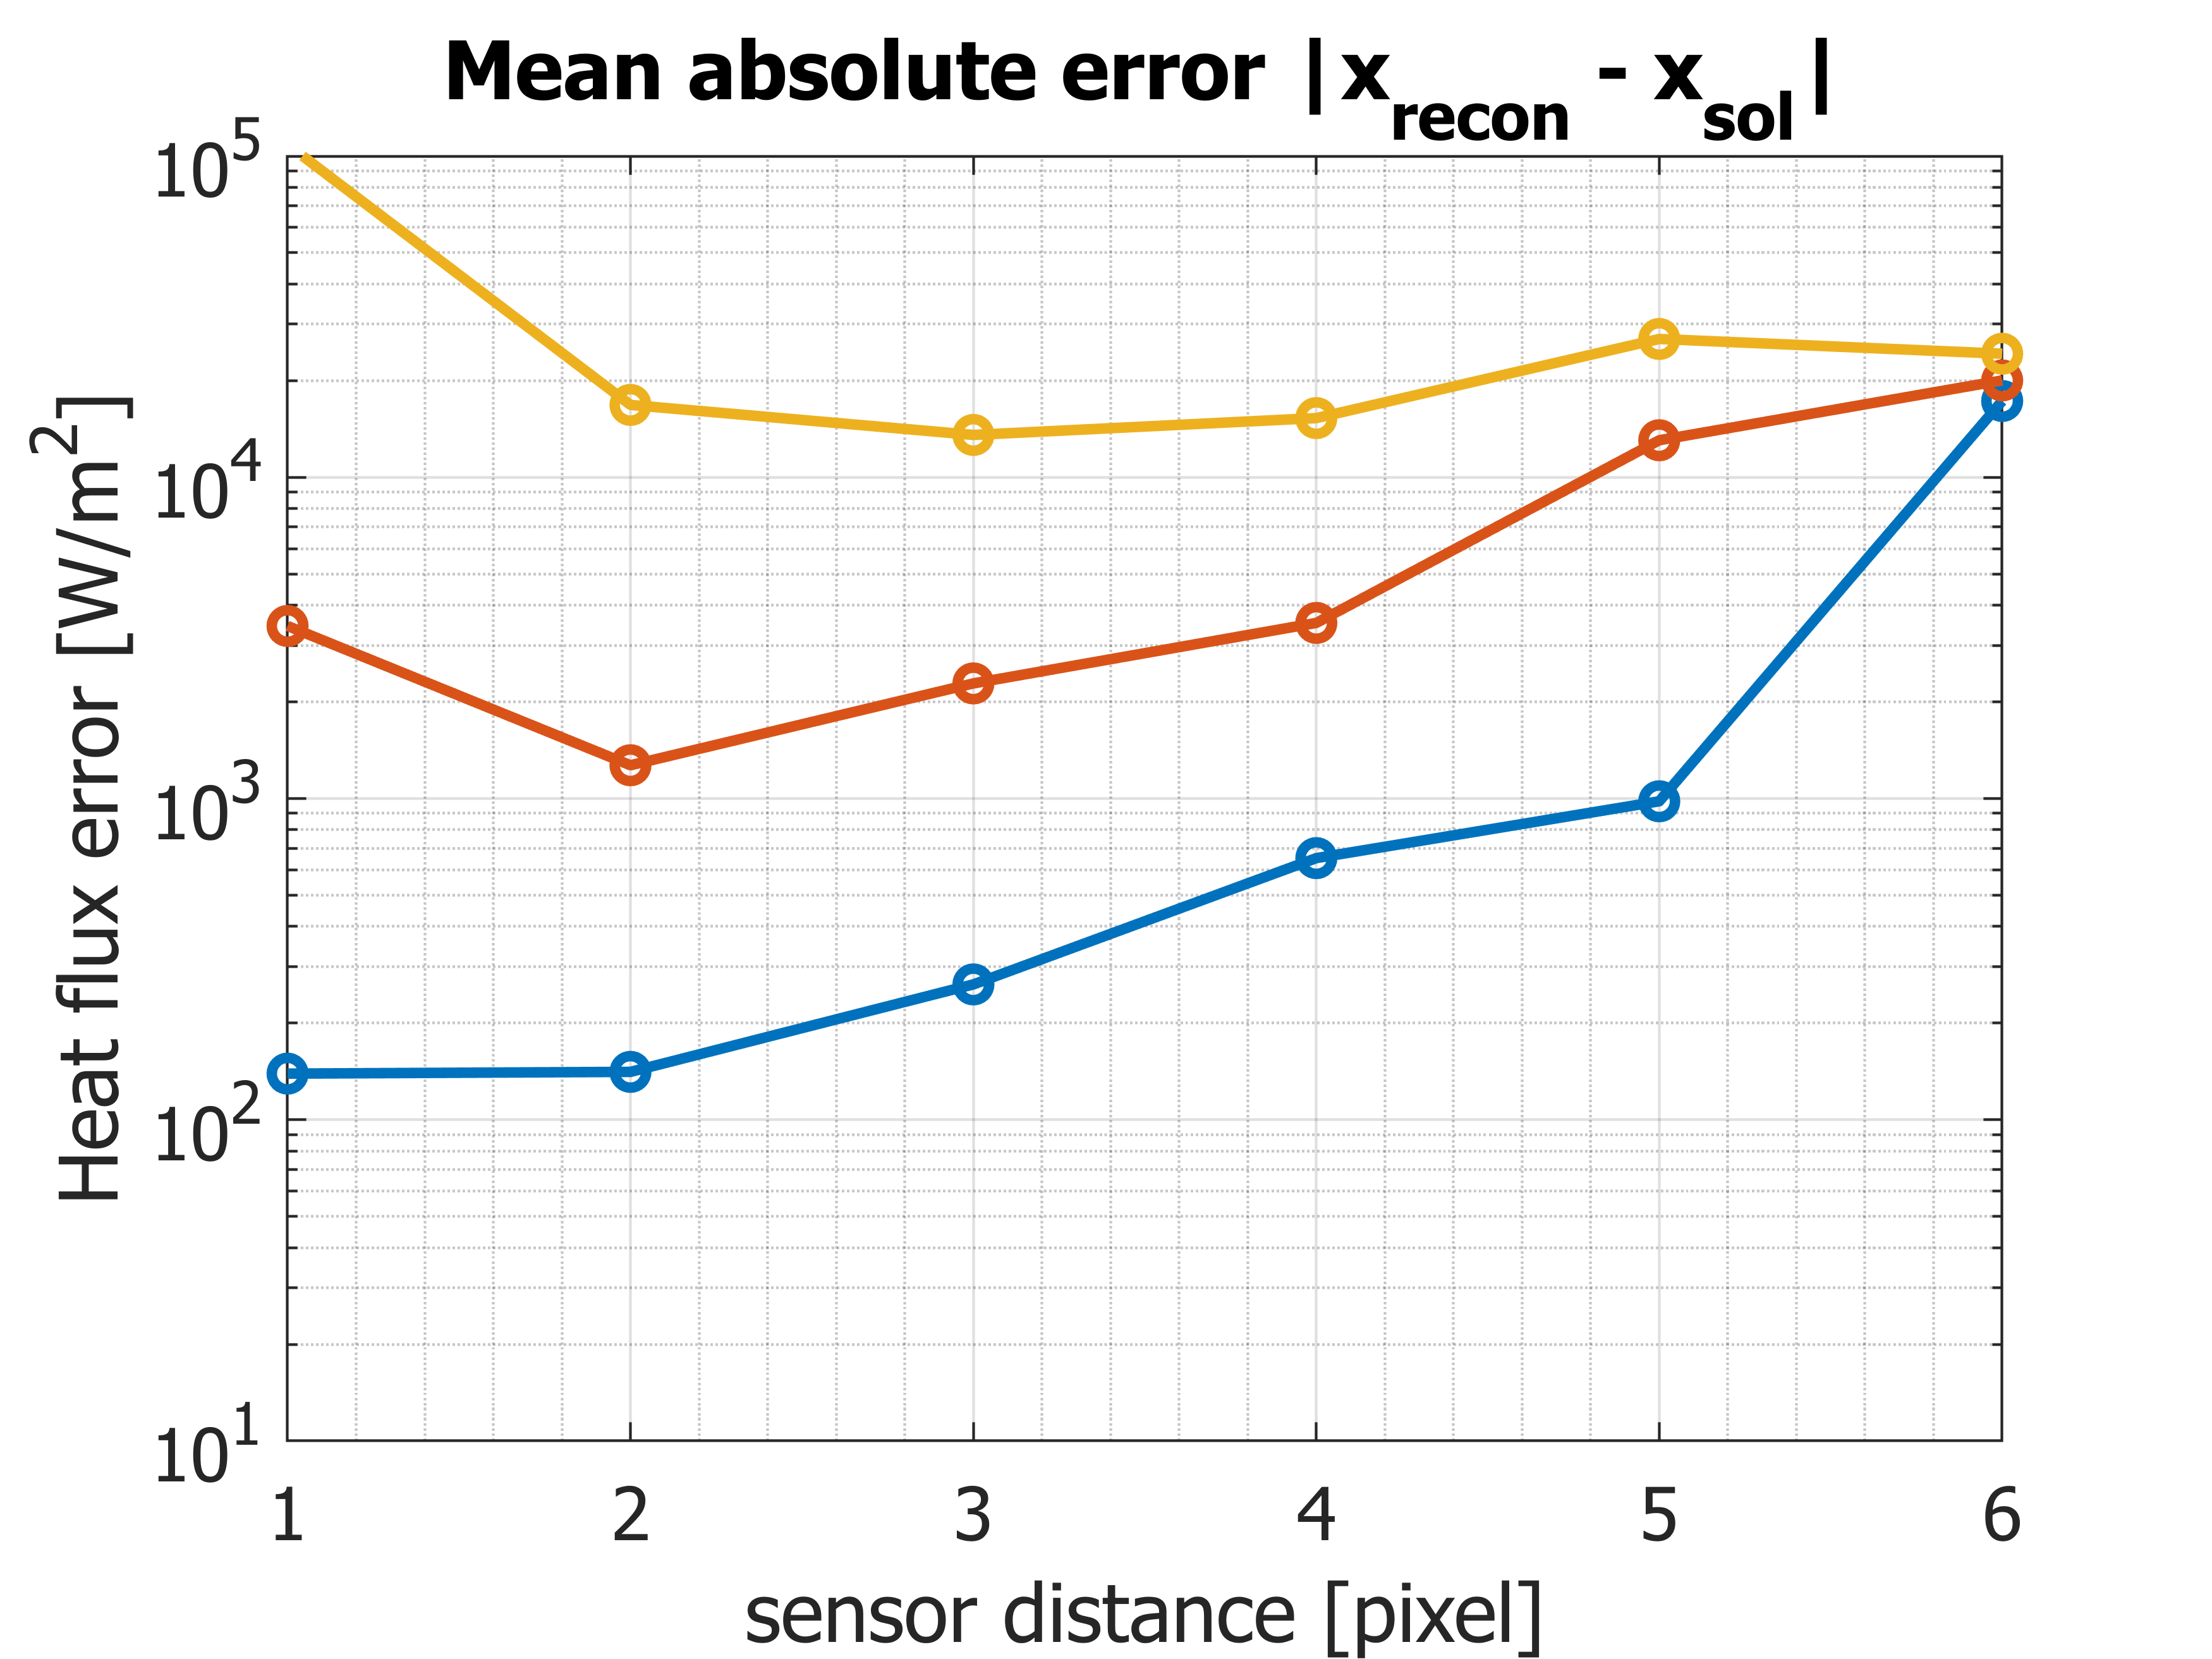

In [5]:
figure;
set(gcf, 'WindowState', 'maximized');
for idn=1:N_noise_case
    plot(sensor_distances, mean_qbcs_reconst_diff_save(idn,:),'-o','Linewidth',2,'displayname', sprintf(' noise %.1f K', noise_magnitude_case(idn)))
    hold on
end

xlabel('sensor distance [pixel]');
ylabel('Heat flux error [W/m^2]')
title('Mean absolute error |x_{recon} - x_{sol}|')
set(gca,'FontSize',fontsize,'fontname','times')
set(gca, 'YScale', 'log')
xlim([1 6])
ylim([10^1 10^5])
yticks([10^1 10^2, 10^3, 10^4, 10^5]);
% yticklabels({'10^{-3}', '10^{-2}', '10^{-1}', '1', '10'});
grid on;
grid minor;

## Regularization


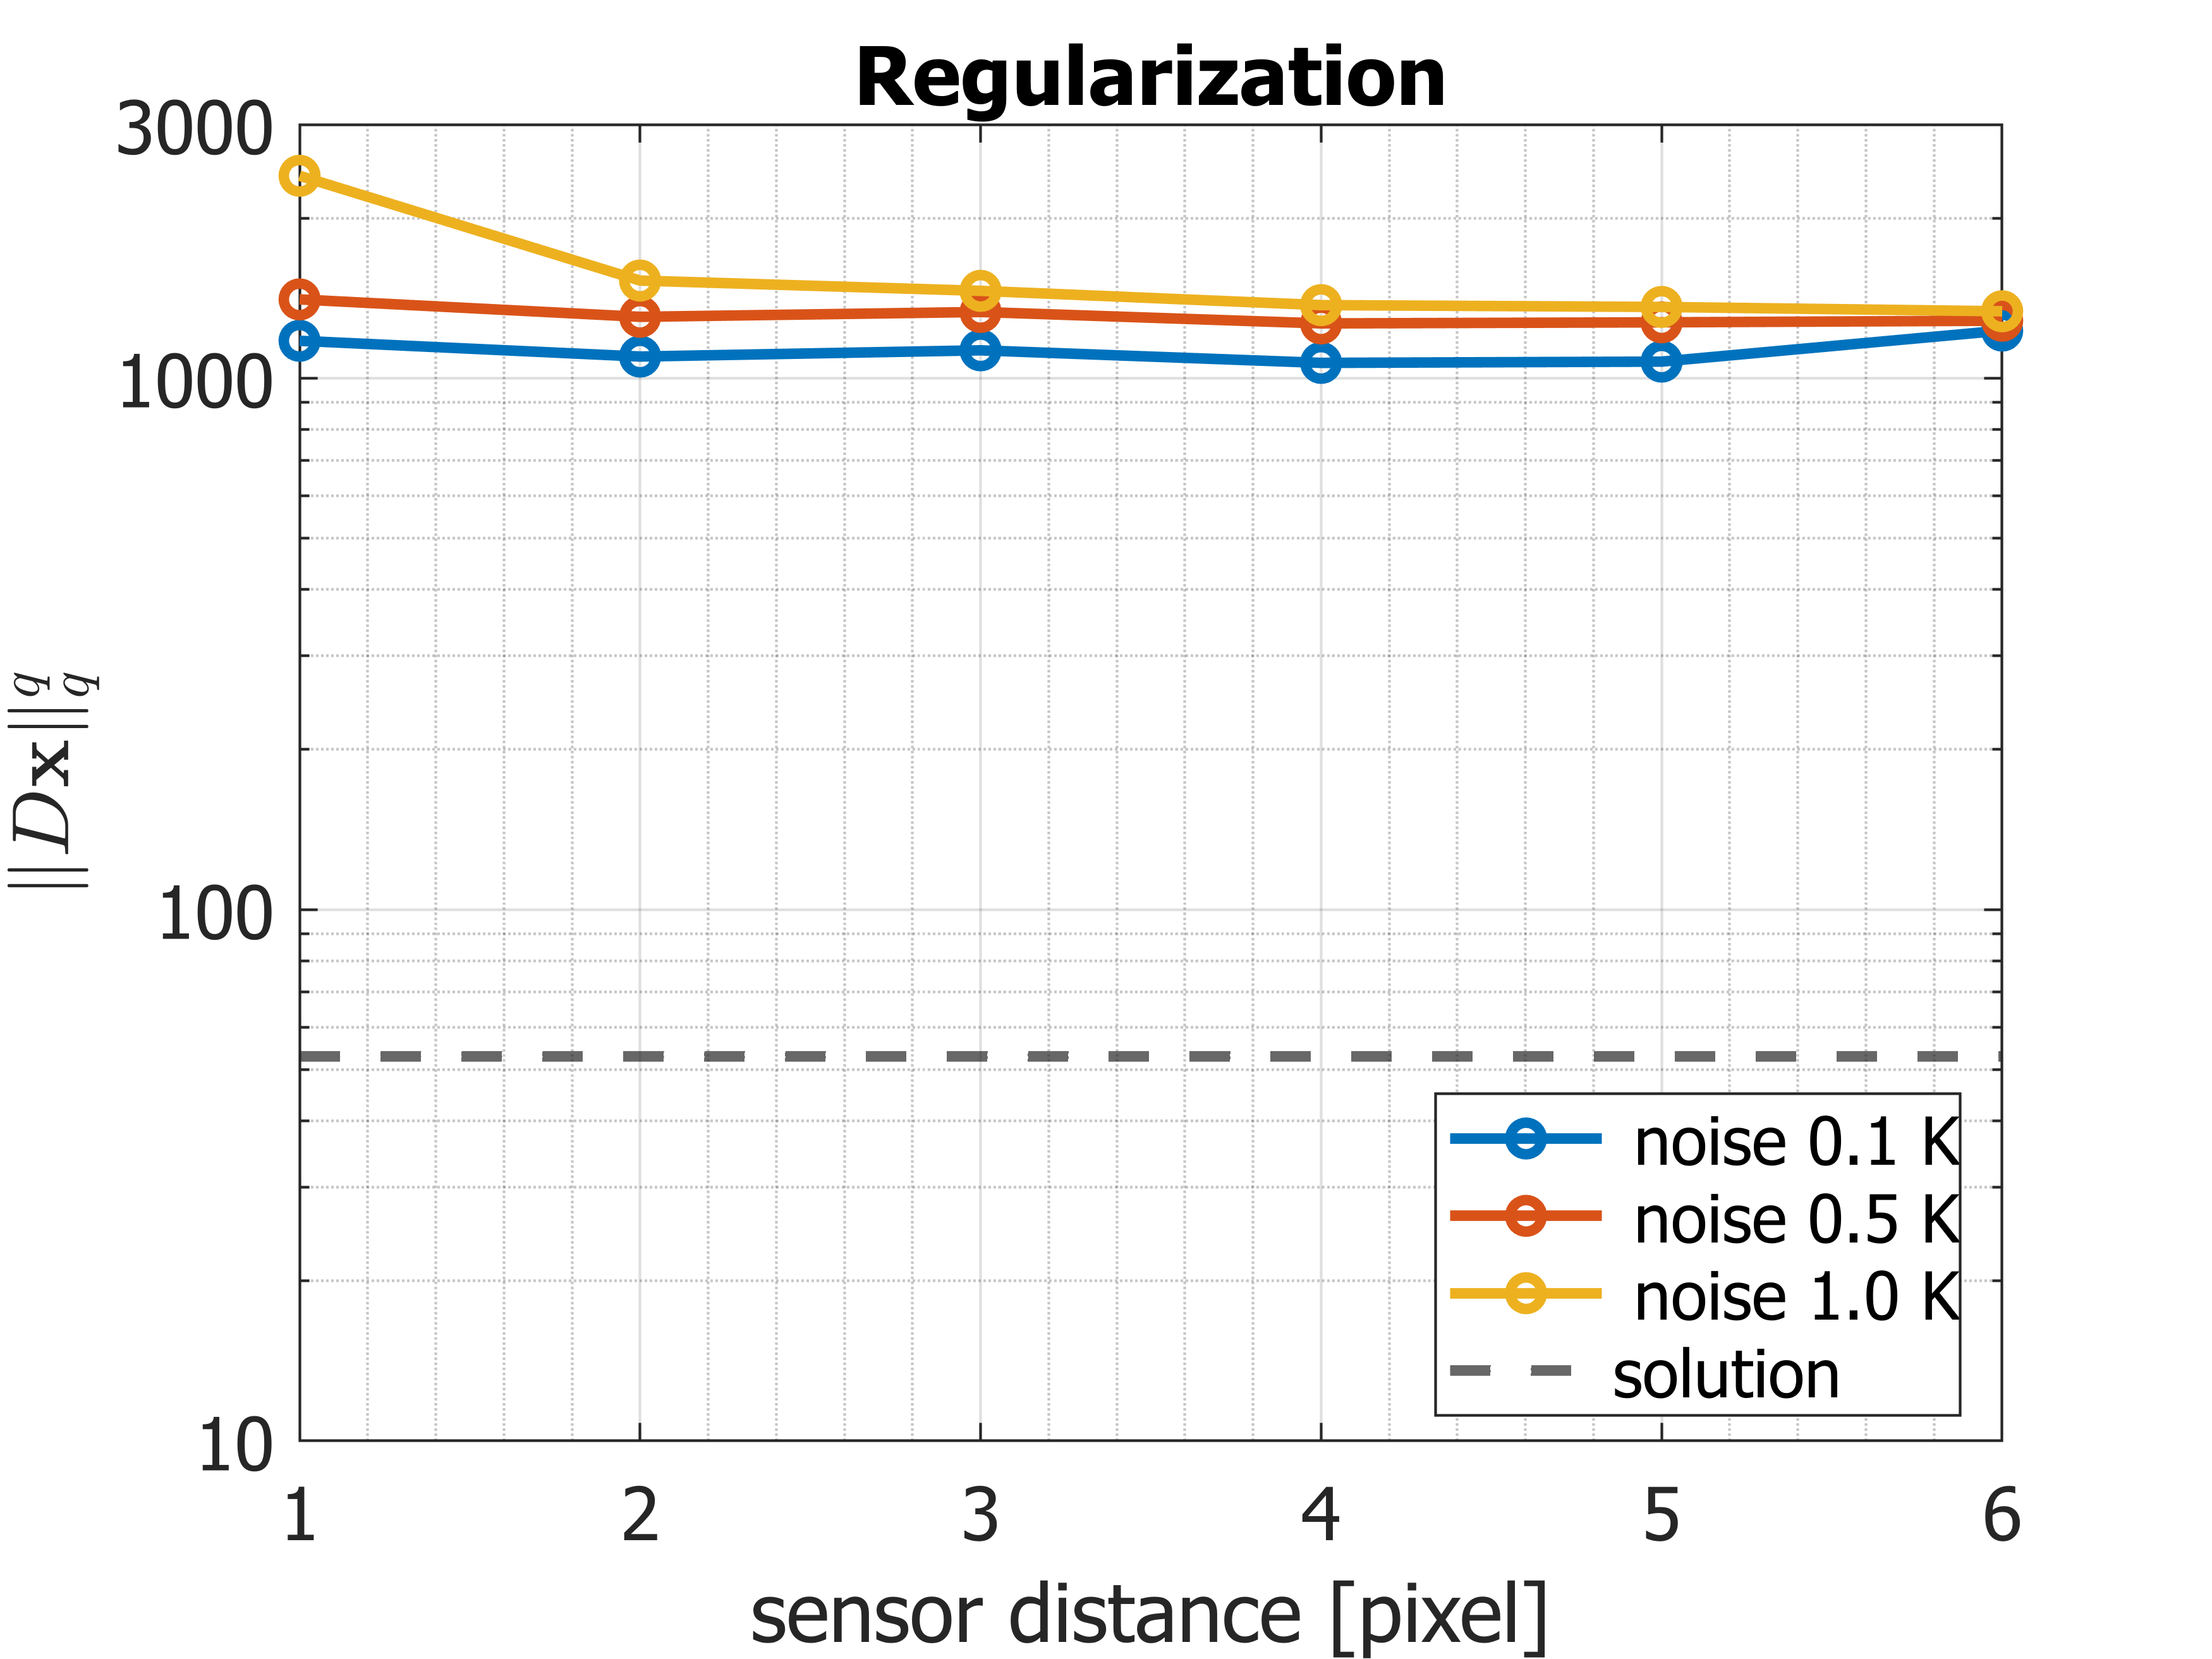

In [6]:
figure;
set(gcf, 'WindowState', 'maximized');
for idn=1:N_noise_case
    plot(sensor_distances, reconst_Lqq_save(idn,:),'-o','Linewidth',2,'displayname', sprintf(' noise %.1f K', noise_magnitude_case(idn)))
    hold on
end
yline(solution_Lqq, '--','LineWidth', 2,'displayname','solution')

xlabel('sensor distance [pixel]');
ylabel(' $\|D\mathbf{x}\|_q^q$ ', 'Interpreter', 'latex', 'FontSize', fontsize);
legend('show','location','southeast')
title('Regularization');
set(gca,'FontSize',fontsize,'fontname','times')
set(gca, 'YScale', 'log')
ylim([10 3*10^3])
yticks([10^1, 10^2, 10^3 3*10^3]);
grid on;
grid minor;

## number edge


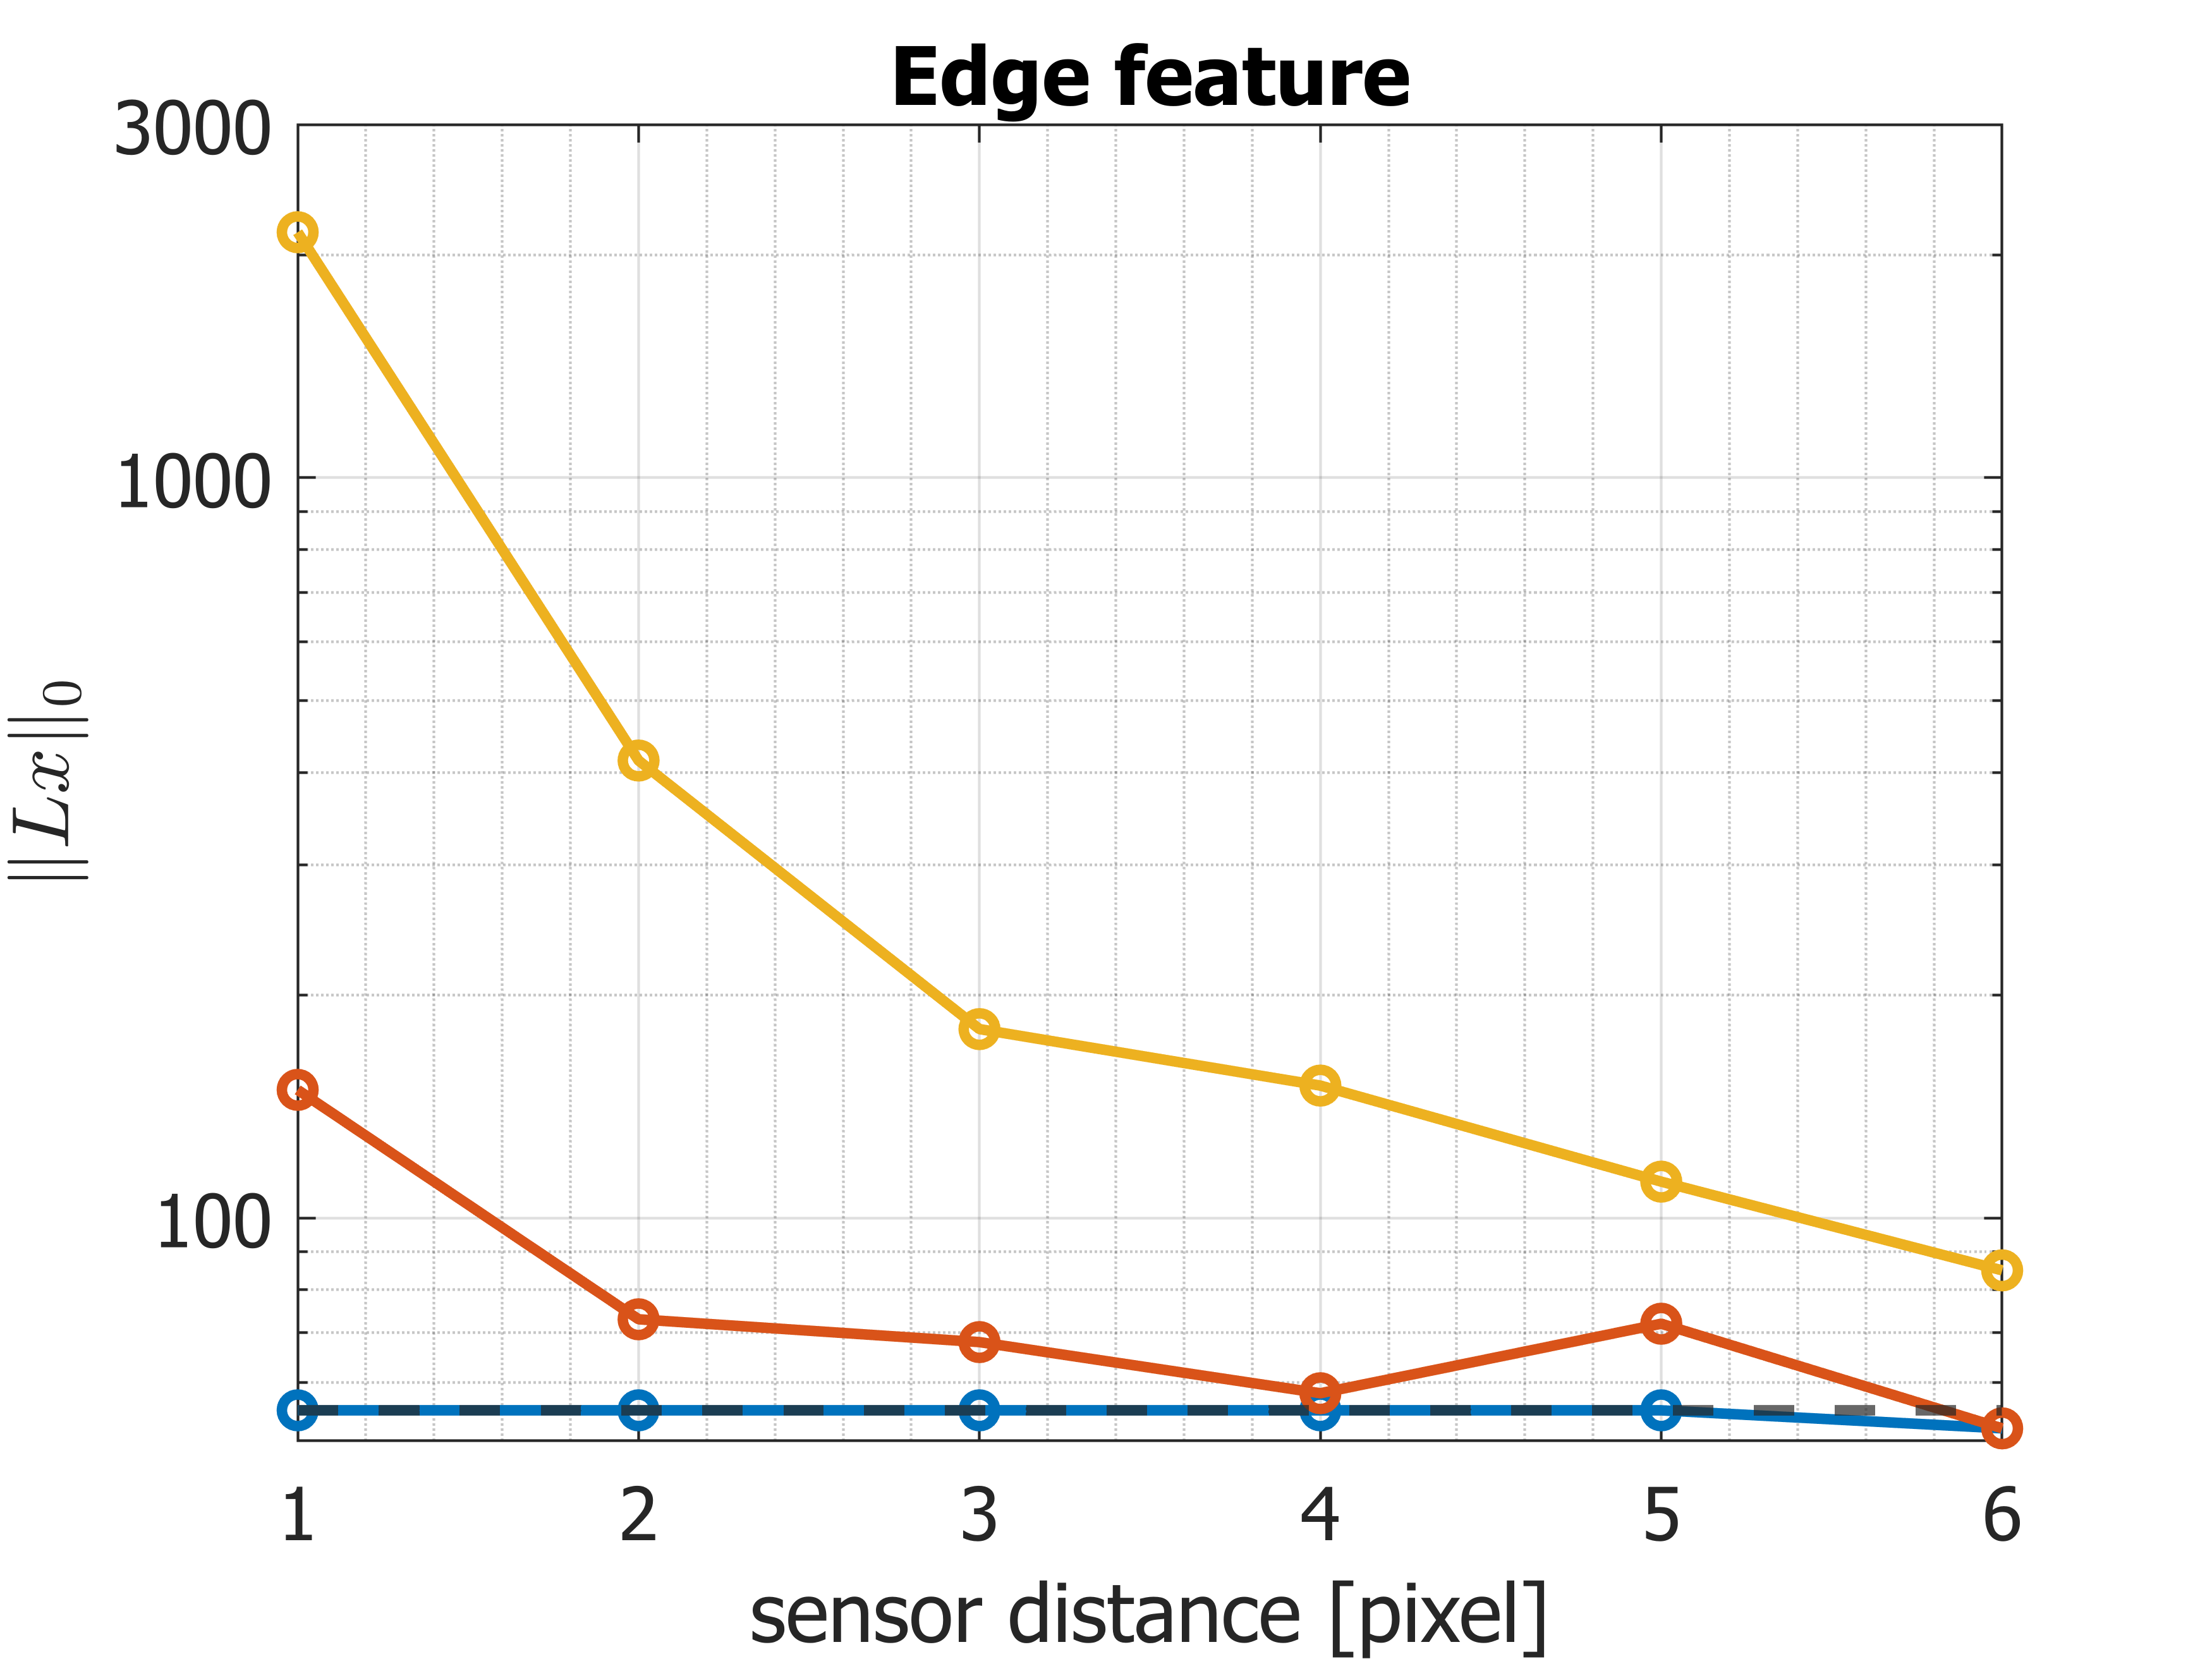

In [7]:
figure;
set(gcf, 'WindowState', 'maximized');
for idn=1:N_noise_case
    plot(sensor_distances, reconst_nnz_save(idn,:),'-o','Linewidth',2,'displayname', sprintf(' noise %.1f K', noise_magnitude_case(idn)))
    hold on
end
yline(solution_L0,'--','LineWidth',2,'displayname',' solution')

xlabel('sensor distance [pixel]');
ylabel(' $\|Lx\|_0$ ', 'Interpreter', 'latex', 'FontSize', fontsize);
title('Edge feature');
set(gca,'FontSize', fontsize,'fontname','times')
set(gca, 'YScale', 'log')
ylim([50 3*10^3])
yticks([10^2, 10^3 3*10^3]);
grid on;
grid minor;

## intersection over union


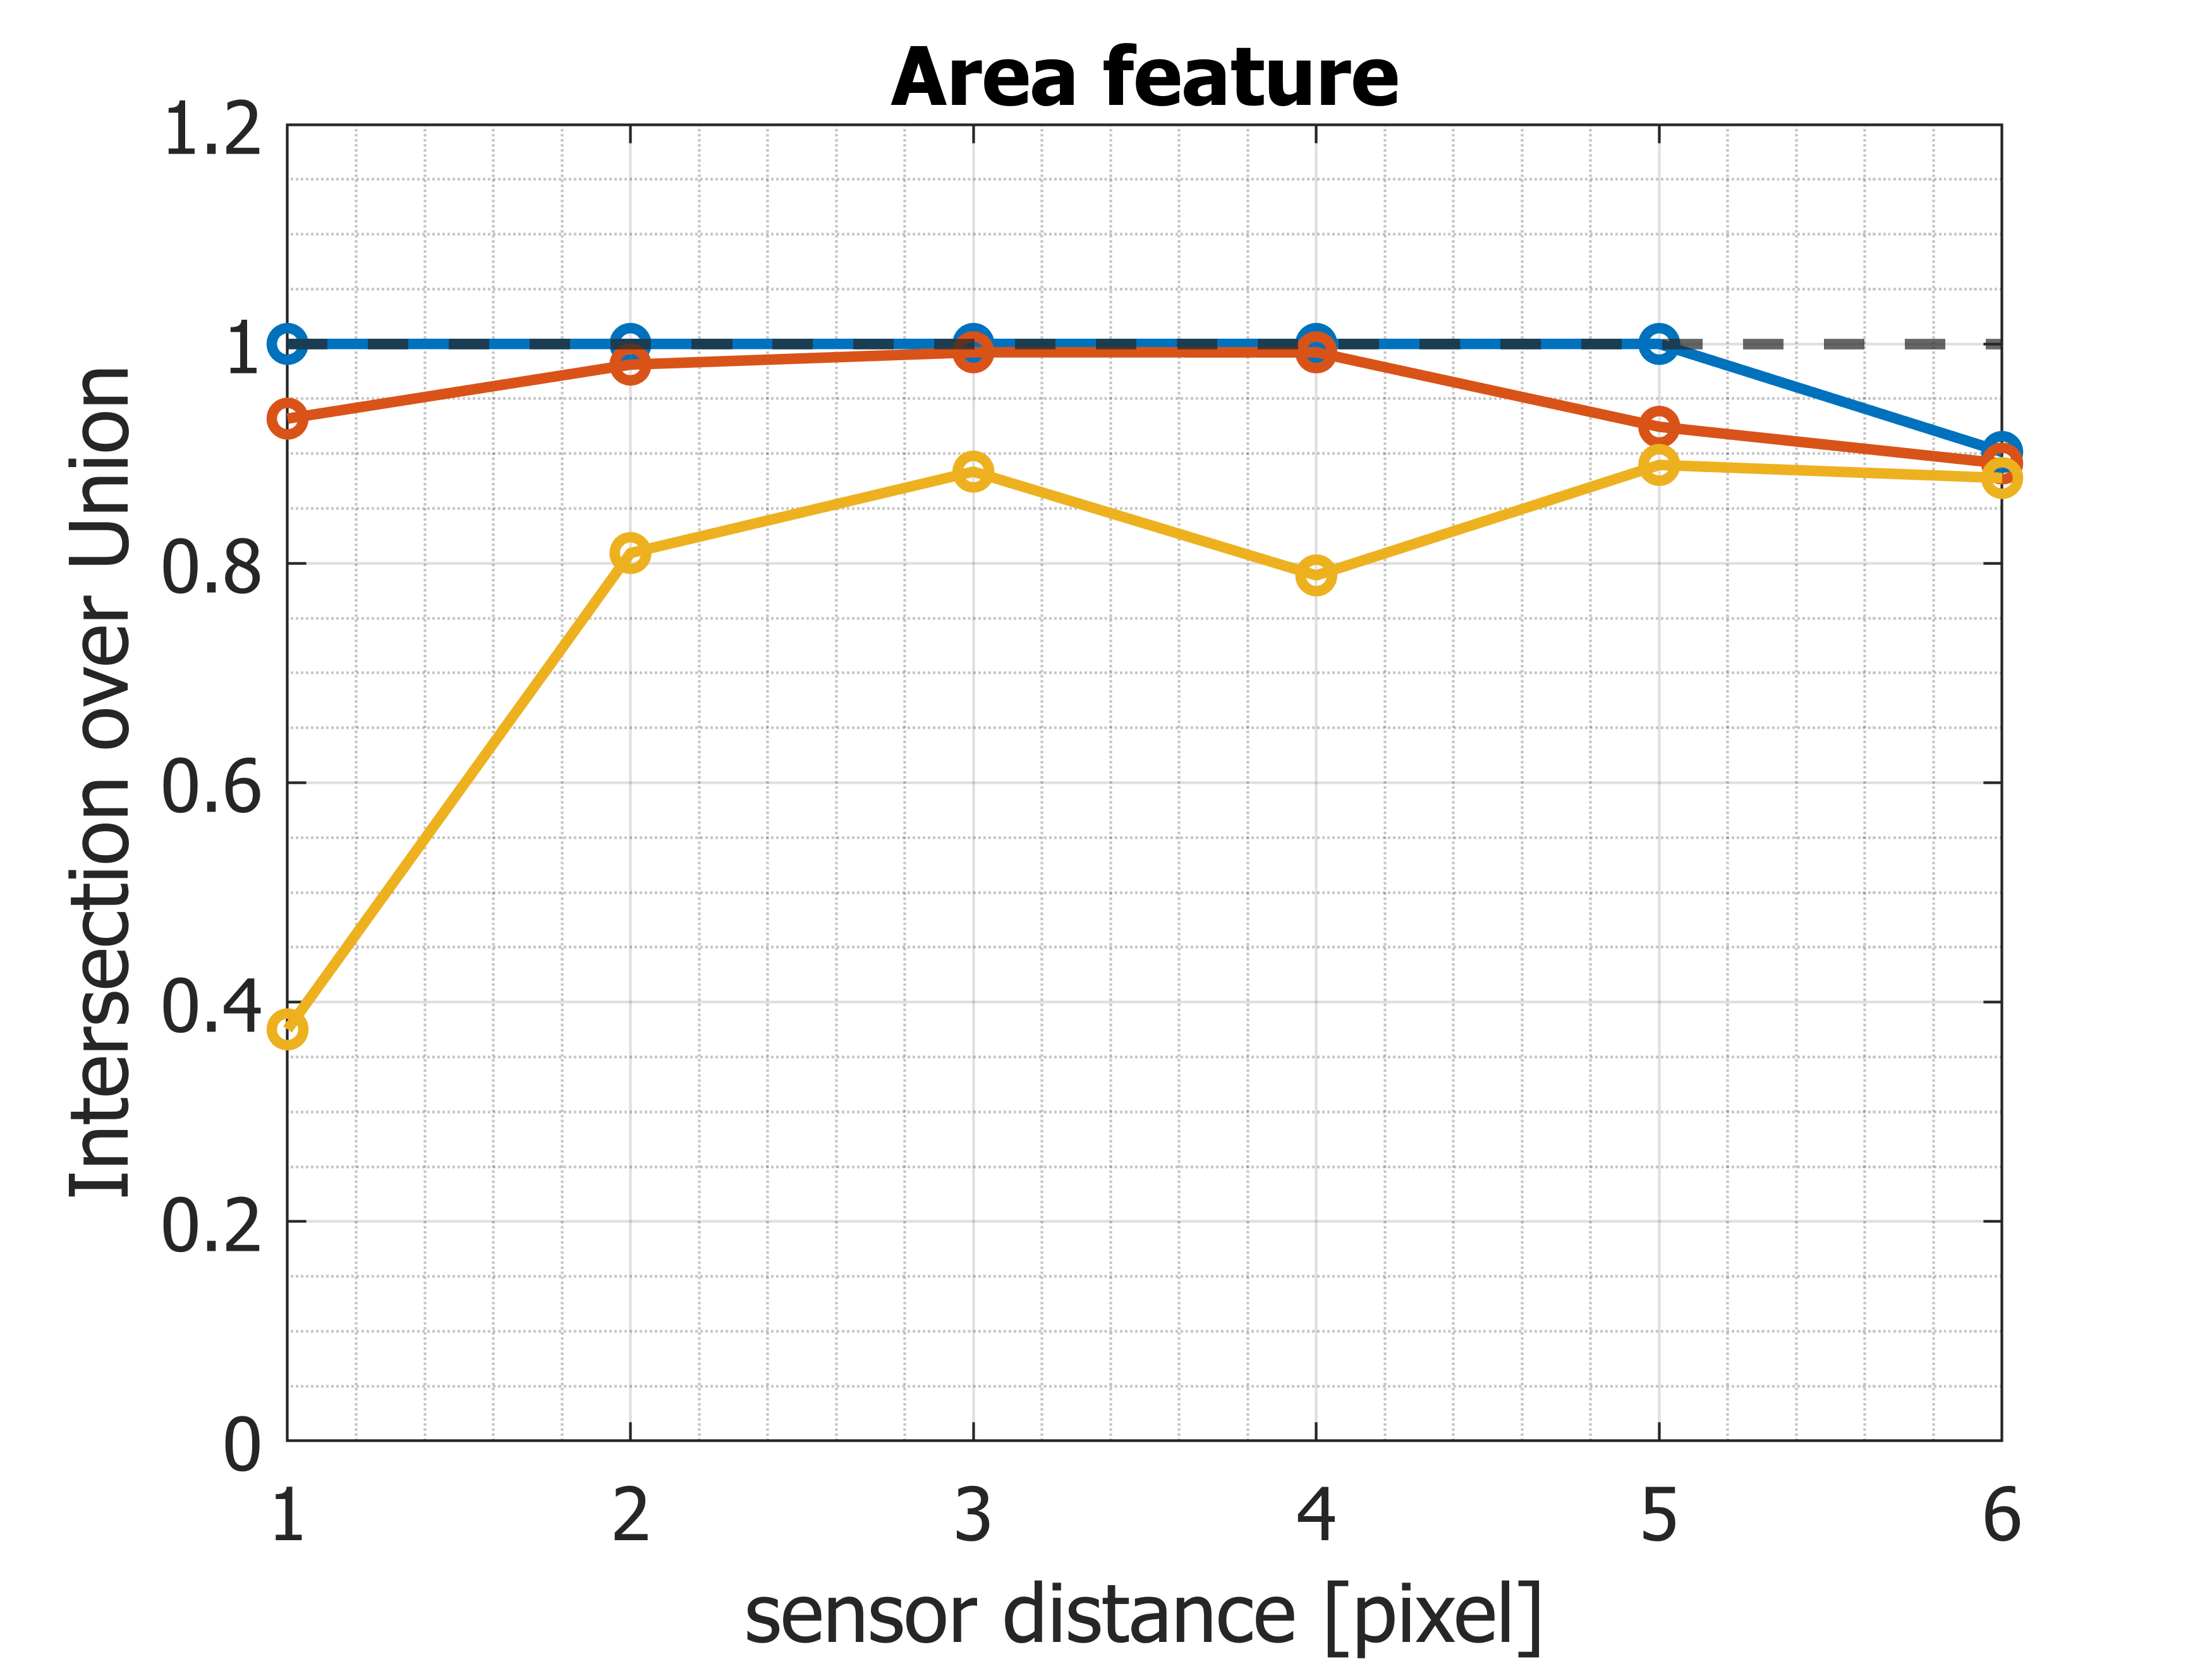

In [8]:
figure;
set(gcf, 'WindowState', 'maximized');
for idn=1:N_noise_case
    plot(sensor_distances, iou_save(idn,:),'-o','Linewidth',2,'displayname', sprintf(' noise %.1f K', noise_magnitude_case(idn)))
    hold on
end
yline(1,'--','Linewidth',2,'handlevisibility','off')

xlabel('sensor distance [pixel]');
ylabel('Intersection over Union');
ylim([0 1.2])
title('Area feature')
set(gca, 'FontSize', fontsize, 'FontName', 'Times');
grid on
grid minor

## estimated noise


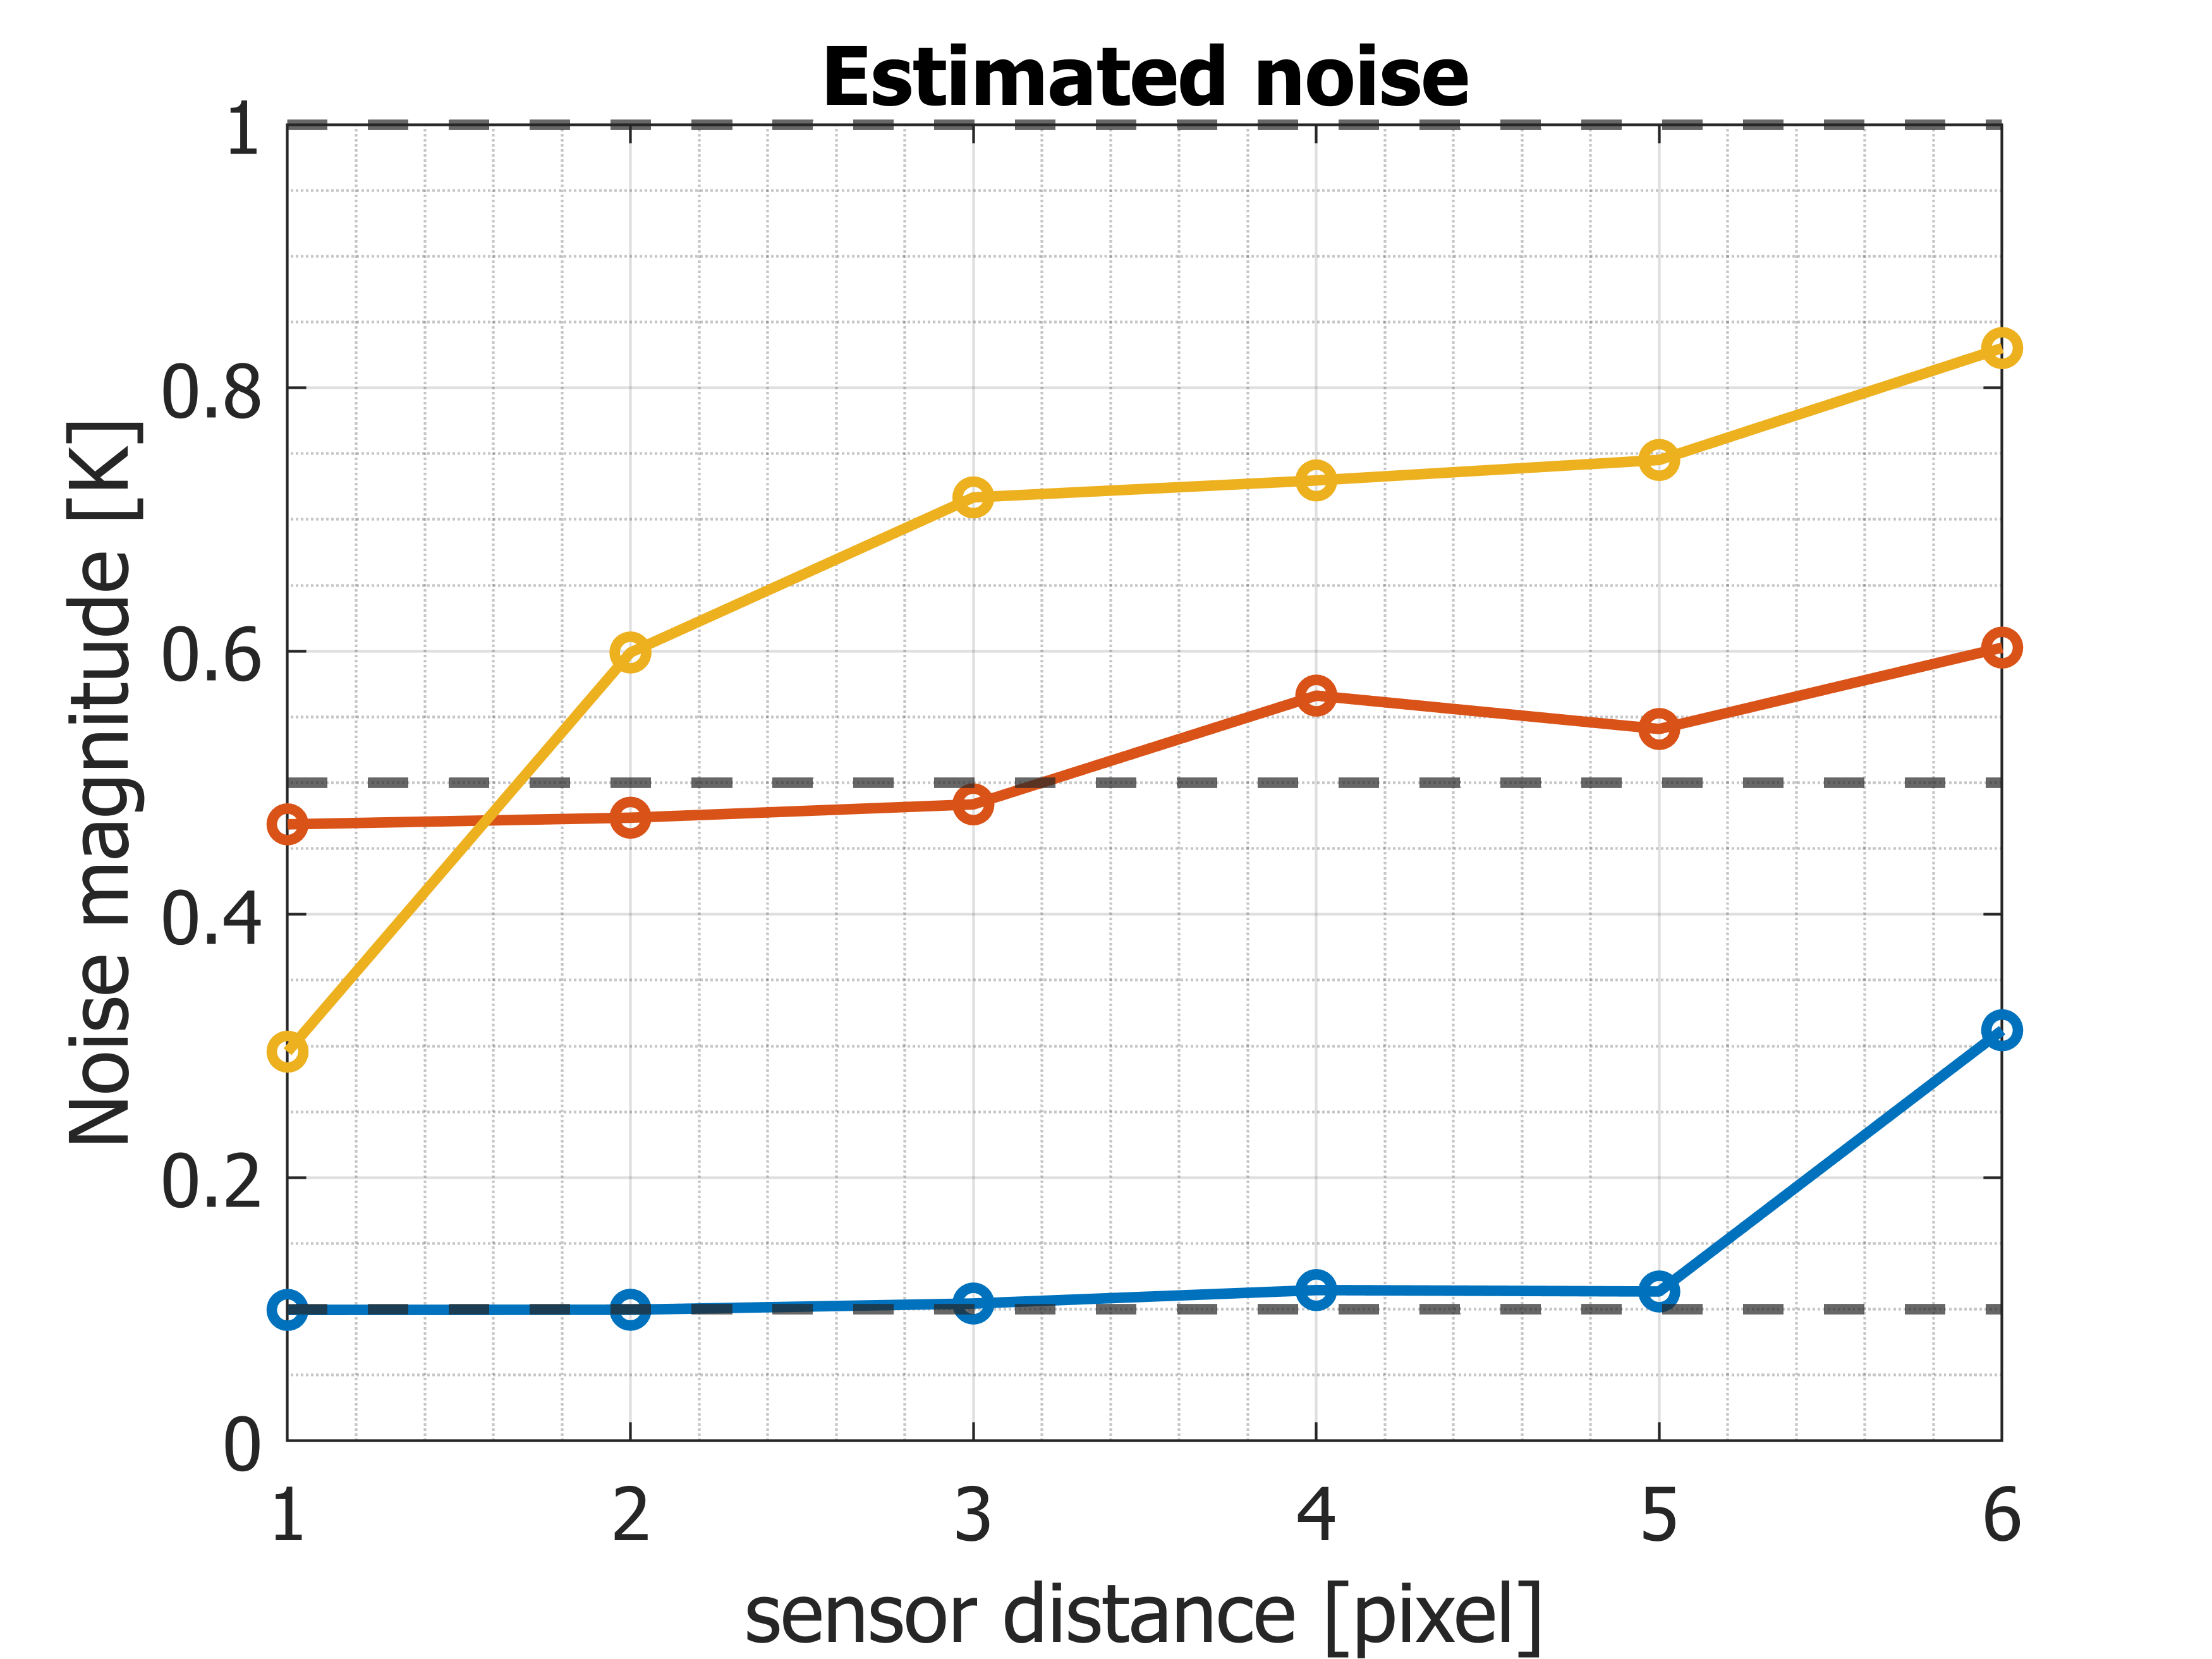

In [9]:
figure;
set(gcf, 'WindowState', 'maximized');
for idn=1:N_noise_case
    plot(sensor_distances, noise_estimation_save(idn,:),'-o','Linewidth',2,'displayname', sprintf(' noise %.1f K', noise_magnitude_case(idn)))
    hold on
    yline(noise_magnitude_case(idn),'--','Linewidth',2,'handlevisibility','off')
    hold on
end

xlabel('sensor distance [pixel]');
ylabel('Noise magnitude [K]');
title('Estimated noise')
set(gca, 'FontSize', fontsize, 'FontName', 'Times');
grid on
grid minor

## plot original solution

In [10]:
load(inputname1,'z_grid_mm','y_grid_mm','q_source','vertices');

## produce sensor matrix


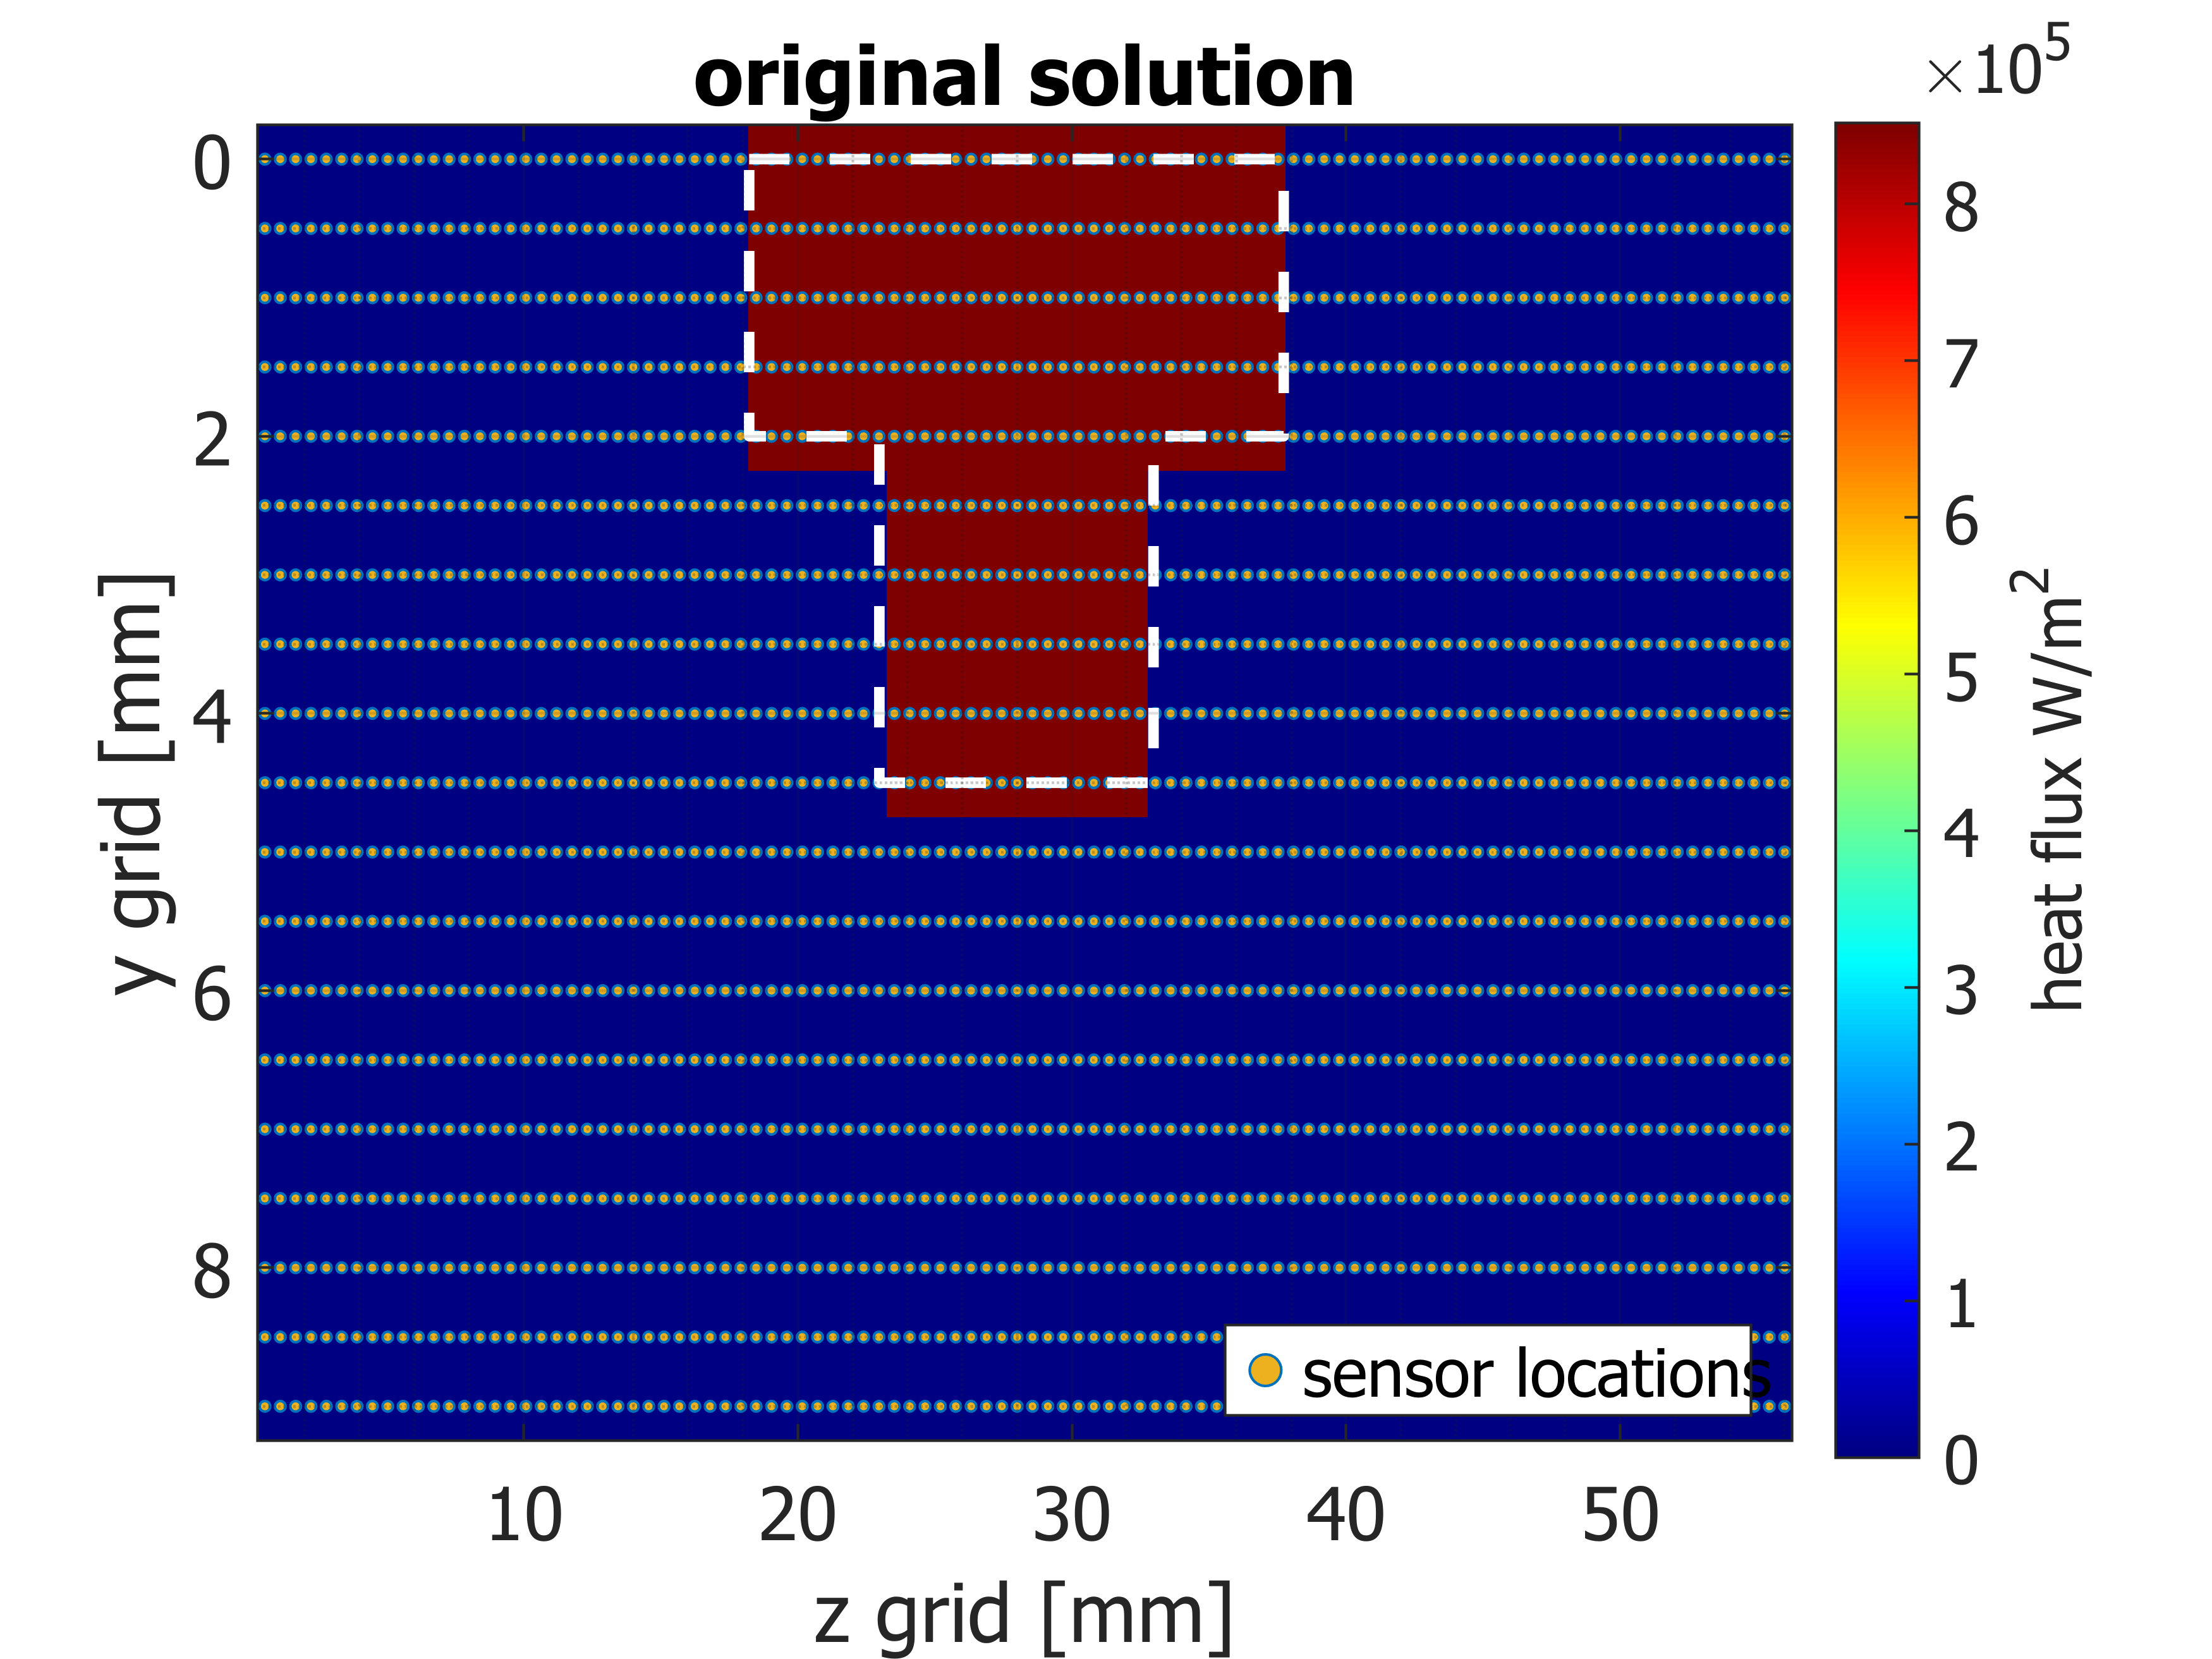

In [11]:
input_z = [2:1:101];
input_y = [1:1:19];
sensor_user_input = zeros(length(input_z)*length(input_y),3);
for iz=1:length(input_z)
    for iy=1:length(input_y)
        row = (iz-1)*length(input_y) + iy;
        sensor_user_input(row, 1) = input_z(iz);
        sensor_user_input(row, 3) = input_y(iy);
    end
end
sensor_index_z = sensor_user_input(:,1);
sensor_index_y = sensor_user_input(:,3);

figure;
set(gcf, 'WindowState', 'maximized');
imagesc(z_grid_mm(2:end), y_grid_mm, q_source(2:end,:)')
hold on
scatter(z_grid_mm(sensor_index_z), y_grid_mm(sensor_index_y),4,'displayname','sensor locations','MarkerFaceColor','#EDB120')
hold on
plot(vertices(:,1)*1000, vertices(:,2)*1000, 'w--', 'LineWidth',2,'handlevisibility','off'); % draw white line (need existing figure)
colormap('jet');
c = colorbar; % Get the handle of the colorbar
ylabel(c, 'heat flux W/m^2')
xlabel('z grid [mm]')
ylabel('y grid [mm]')
titleStr = sprintf('original solution');
title(titleStr);
legend('show','location','southeast')
set(gca,'FontSize',fontsize,'fontname','times')
grid on
grid minor